## <center> **DIABETES PREDICTION MODEL**<center>

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE
import pickle as pkl


In [63]:
df = pd.read_csv('D:\ML\DISEASE PREDICTION\DIABETES\Dataset\diabetes_prediction_dataset.csv')

## **DATA DESCRIPTION**

In [64]:
df[100:]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
100,Male,38.0,0,0,never,27.32,6.0,158,0
101,Female,74.0,0,0,former,27.32,6.6,85,0
102,Male,27.0,0,0,No Info,27.32,6.2,90,0
103,Female,55.0,0,0,ever,18.60,6.0,160,0
104,Female,80.0,1,0,never,27.32,6.8,280,1
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [66]:
# Check for duplicate record
df.duplicated().sum()

3854

In [67]:
# Delete Duplicate Records
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [68]:
# Check for null records
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [69]:
# Numerical Features
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [70]:
df.describe(include='object')

,gender,smoking_history
count,96146,96146
unique,3,6
top,Female,never
freq,56161,34398


## **FEATURE ENGINEERING**

In [71]:
# Segregate numerical and categorical features
numerical_cols = []
non_numeric_cols = []
for col in df.columns:
    if df[col].dtype != 'O':
        if df[col].nunique() < 5:
            non_numeric_cols.append(col)
        else:
            numerical_cols.append(col)
    else:
        non_numeric_cols.append(col)

In [72]:
print(F"The numerical features are {numerical_cols}\nThe non numerical features are {non_numeric_cols}")

The numerical features are ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
The non numerical features are ['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes']


## **EDA**

In [73]:
# Univariate Analysis for Numeical Features
def univariate_analysis_numeric(col):
    fig, ax = plt.subplots(1, 2, figsize=(12, 10))
    sns.histplot(x=df[col], bins=20, color='skyblue', ax=ax[0])
    ax[0].set_title(f"Histogram for {col}")
    sns.boxplot(x=df[col], ax=ax[1])
    ax[1].set_title(f"Box Plot for {col}")


Univariate Analysis for age column


Univariate Analysis for bmi column
Univariate Analysis for HbA1c_level column
Univariate Analysis for blood_glucose_level column


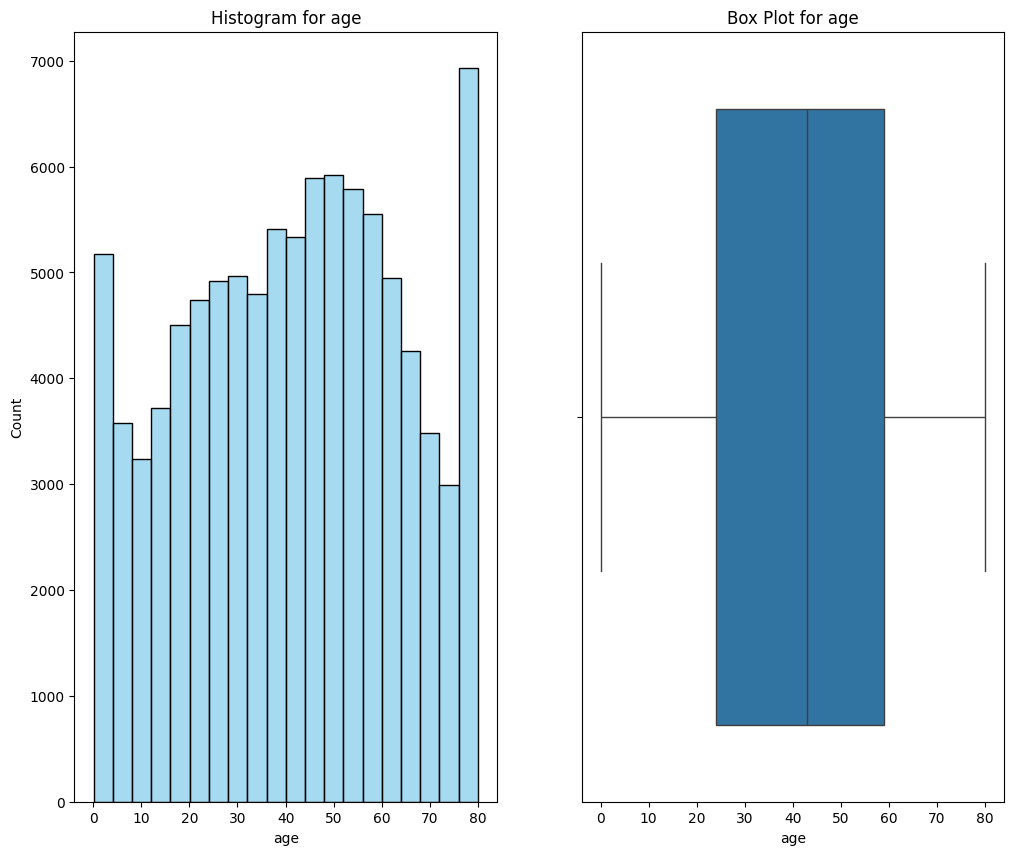

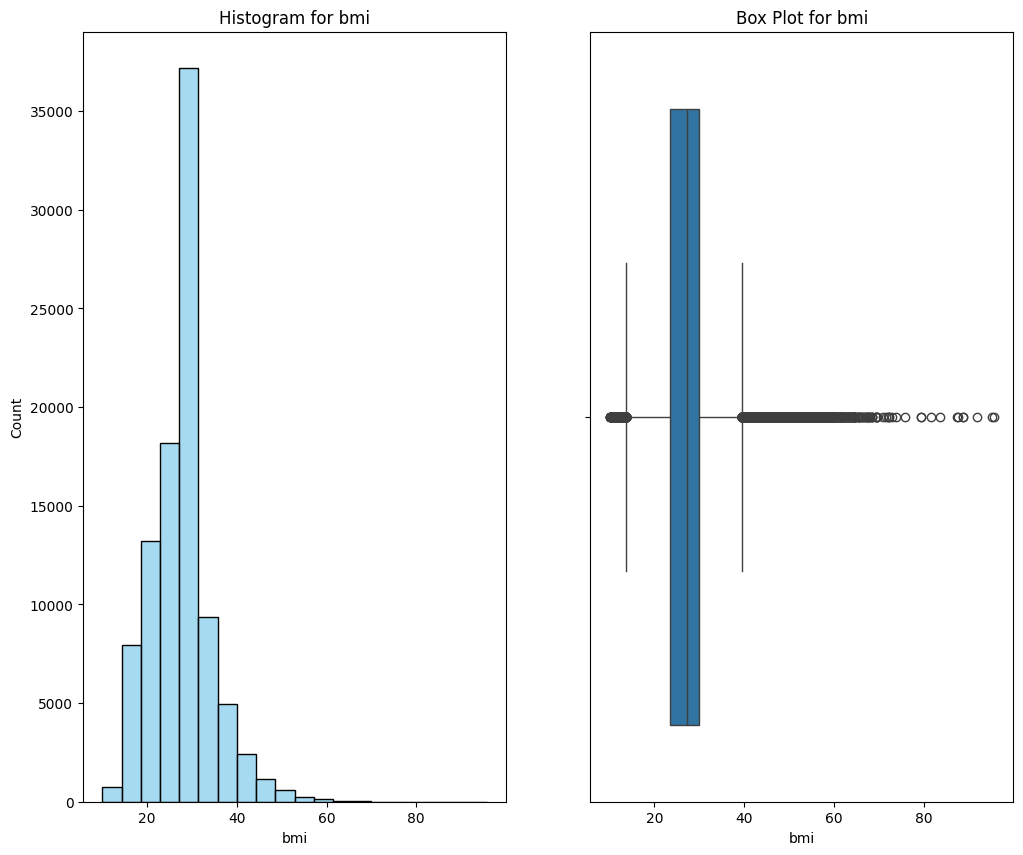

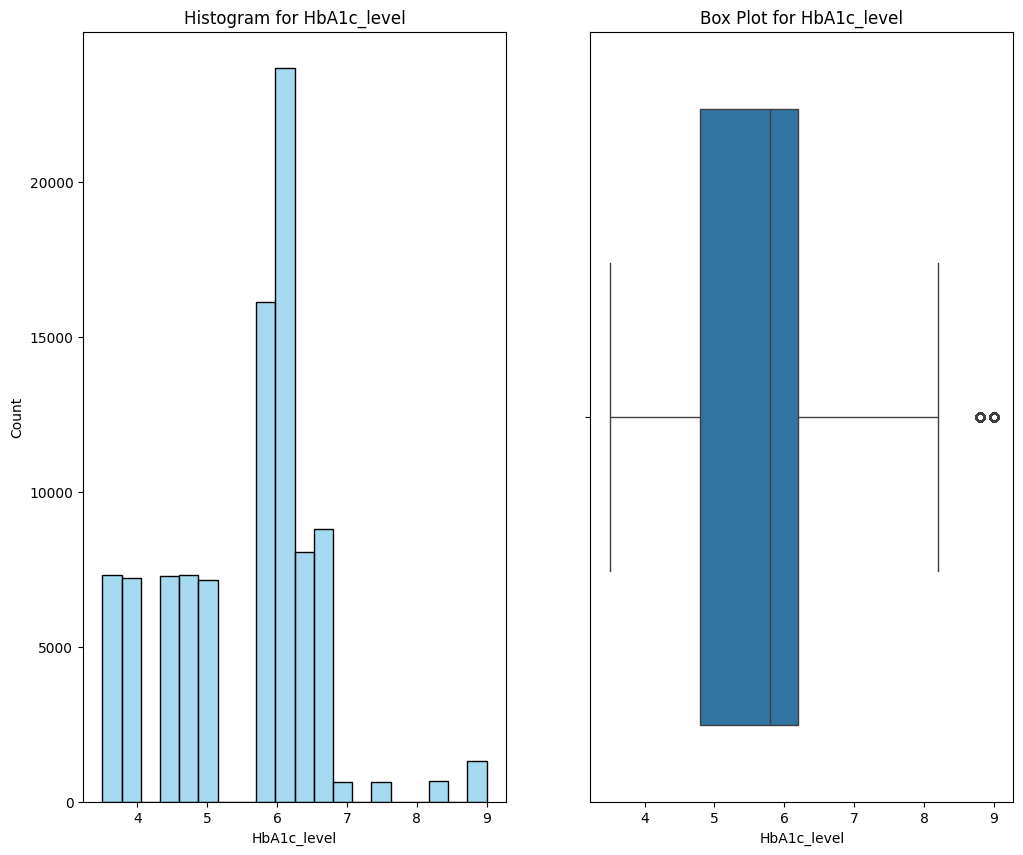

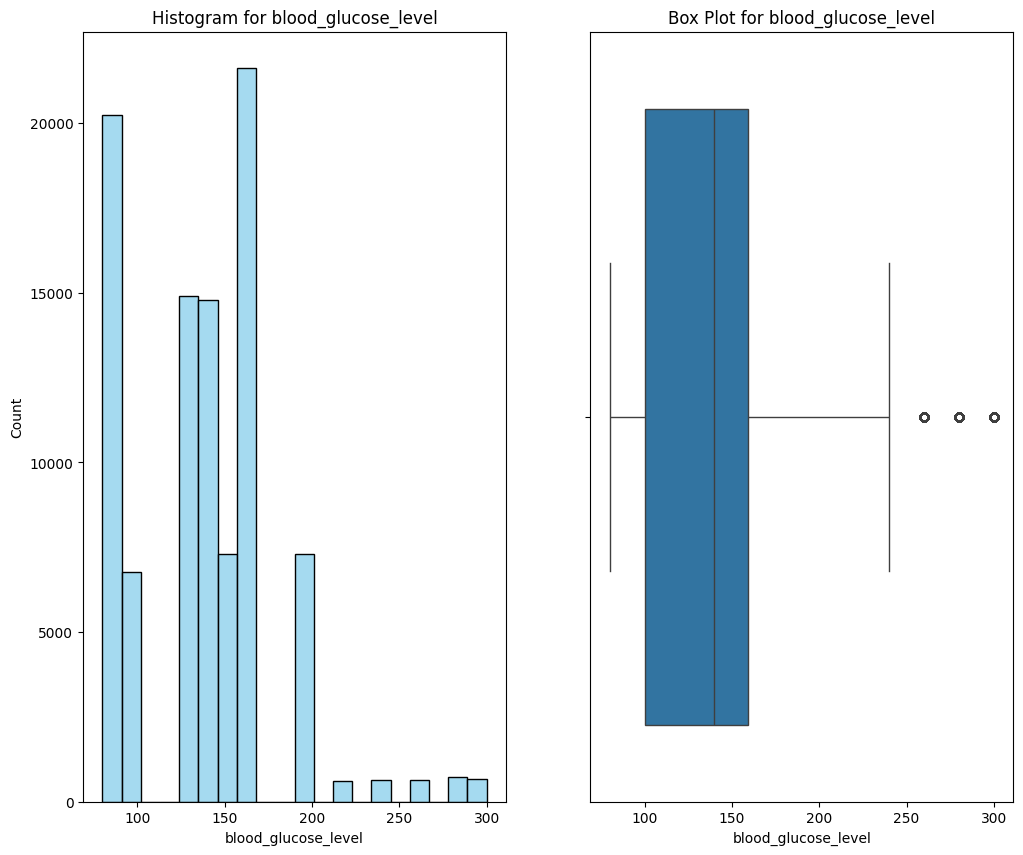

In [74]:
for col in numerical_cols:
    print(f"Univariate Analysis for {col} column")
    univariate_analysis_numeric(col)

In [75]:
# We Will handle the outliers by using standardisation for a few cases

In [76]:
# Univariate Analysis for Categorical Features
def univariate_analysis_cat(col):
    fig, ax = plt.subplots(1,2,figsize=(12,5))
    sns.countplot(x=col, data=df, palette='viridis', ax=ax[0])
    ax[0].set_title(f"Count plot for {col}")
    data_counts = df[col].value_counts()
    ax[1].pie(data_counts,labels=data_counts.index,autopct='%1.3f%%',startangle=90,colors=sns.color_palette('pastel'))
    ax[1].set_title(f"Pie Plot for {col}")

 Univariate analysis for gender column
 Univariate analysis for hypertension column
 Univariate analysis for heart_disease column
 Univariate analysis for smoking_history column
 Univariate analysis for diabetes column


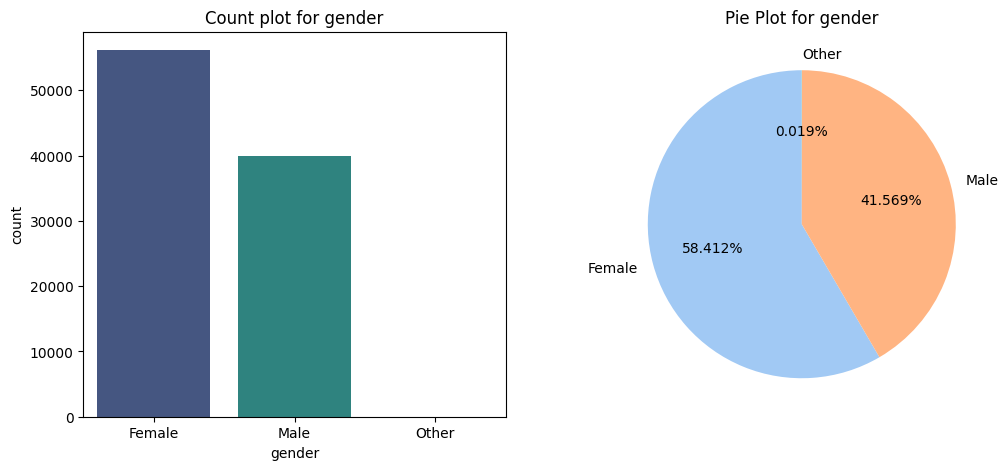

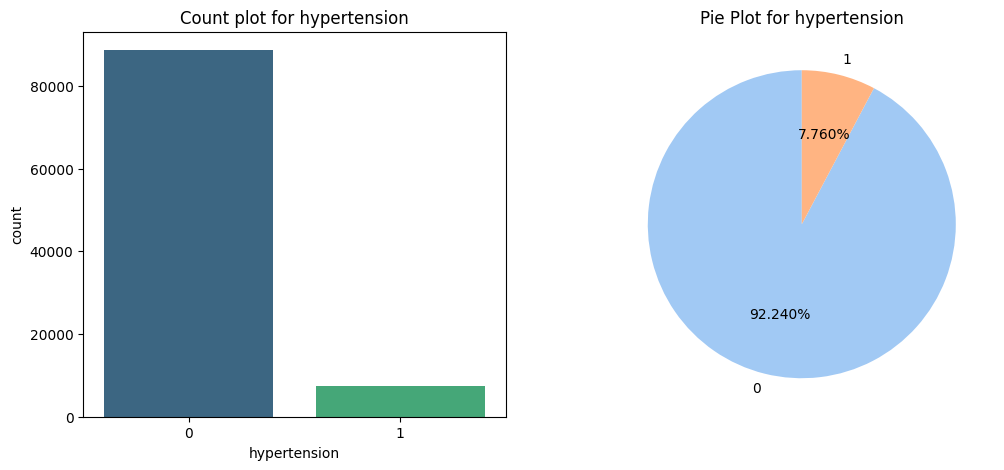

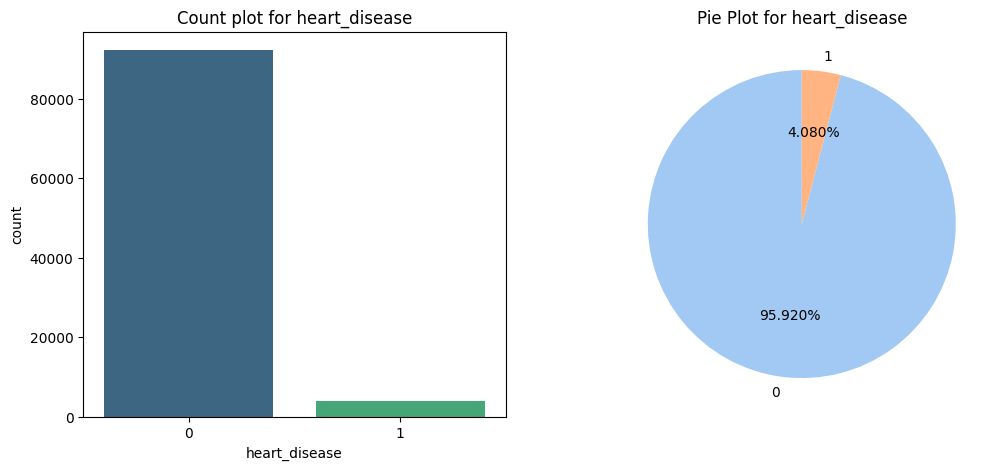

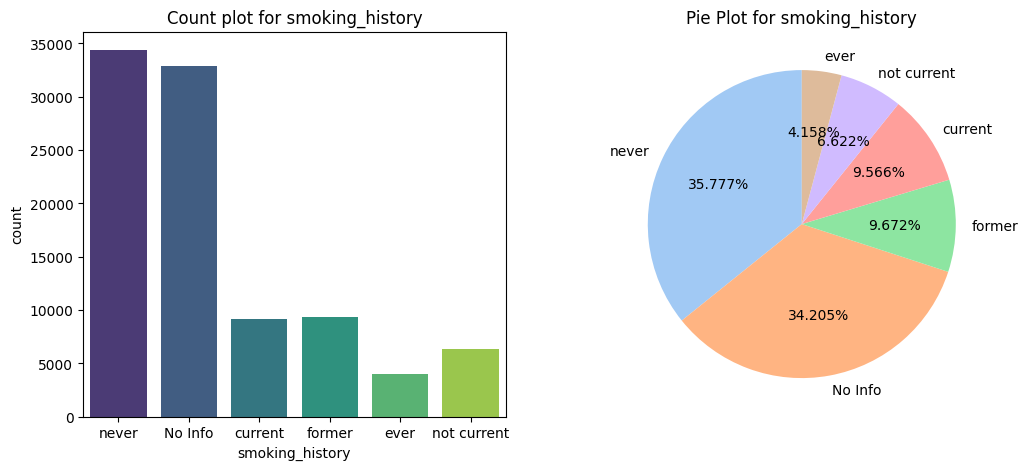

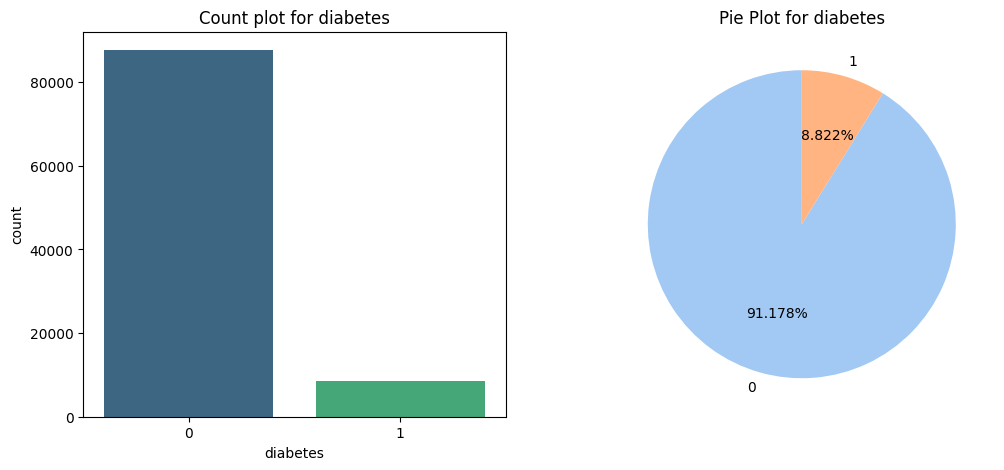

In [77]:
for col in non_numeric_cols:
    print(f' Univariate analysis for {col} column')
    univariate_analysis_cat(col)

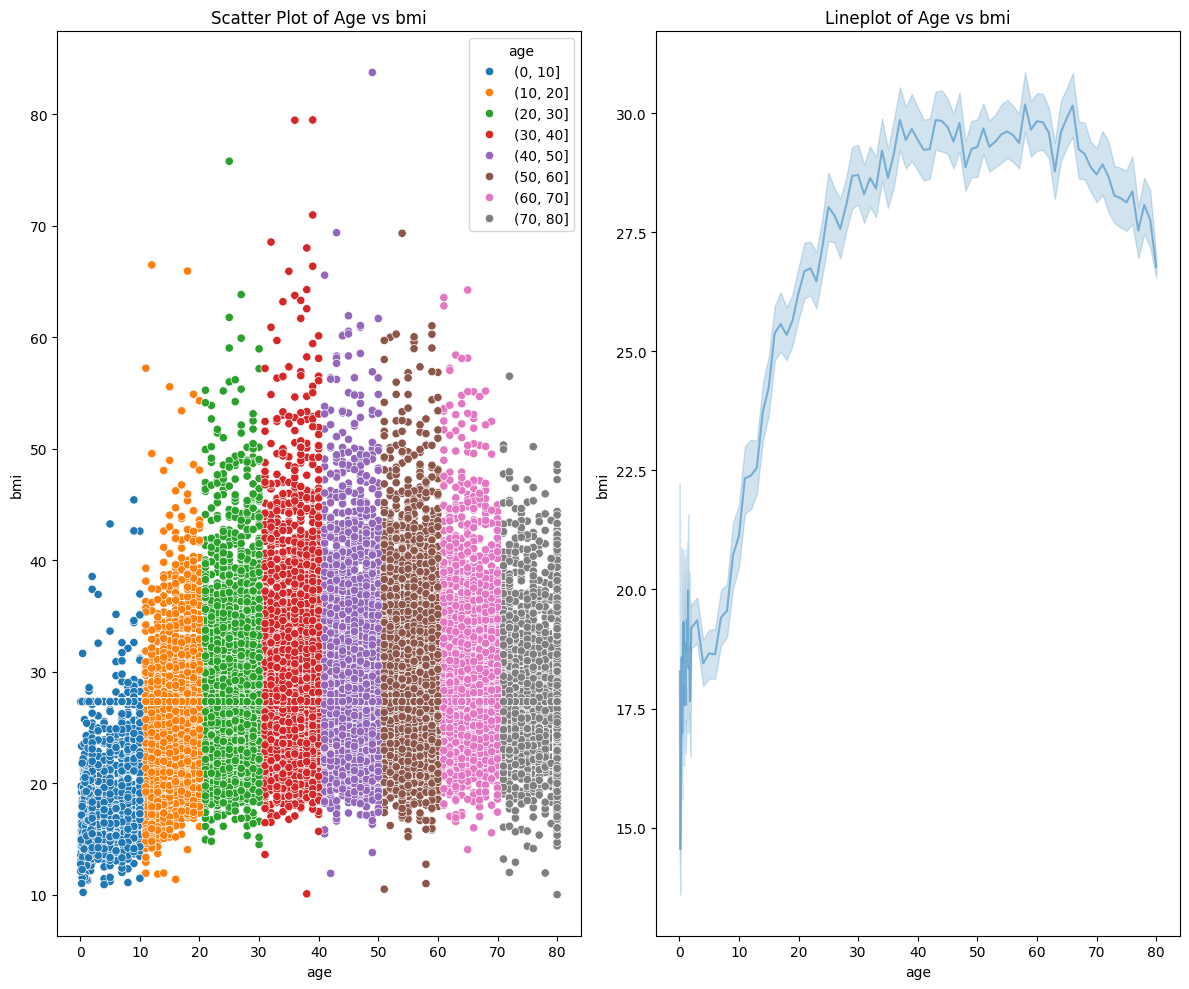

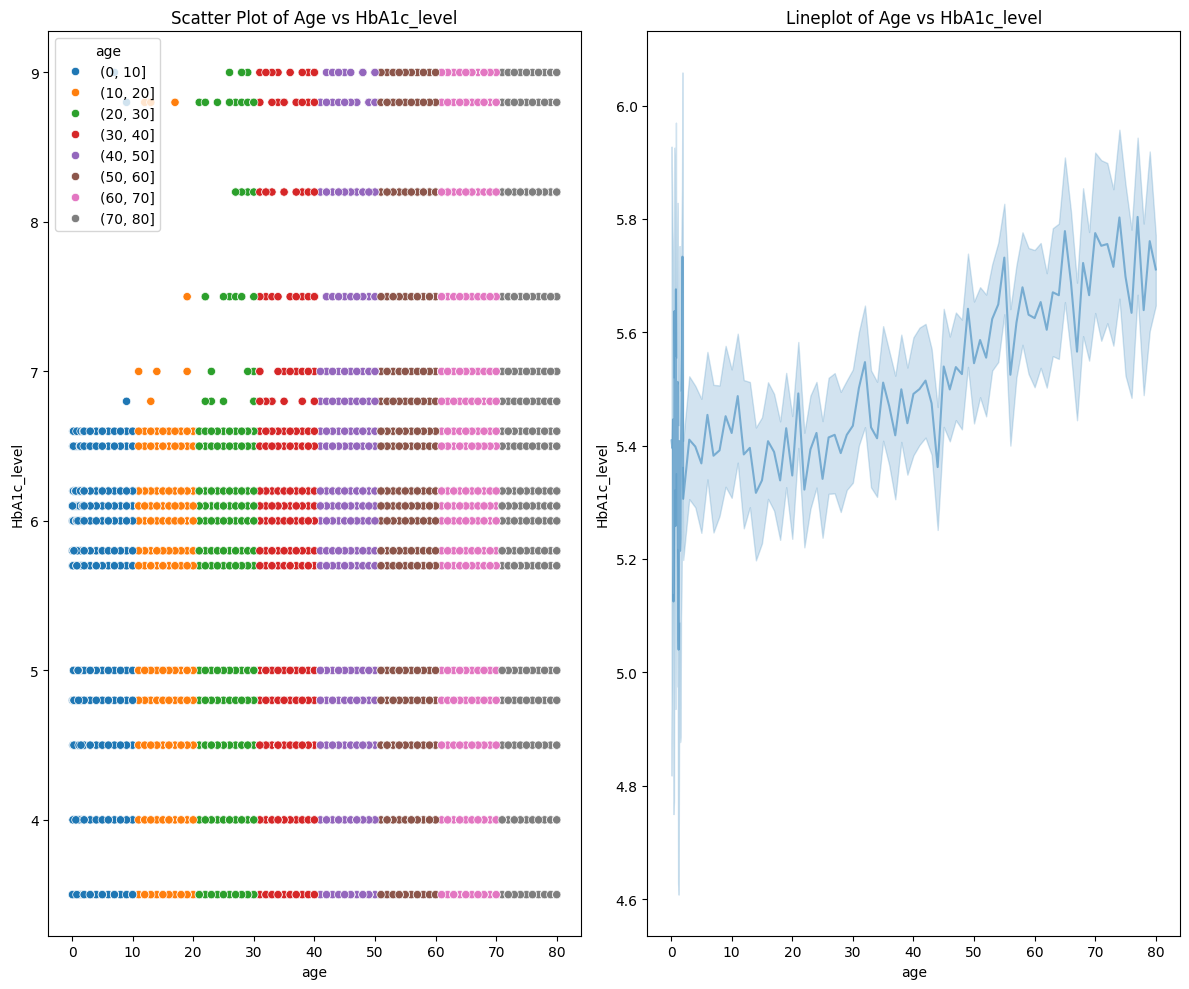

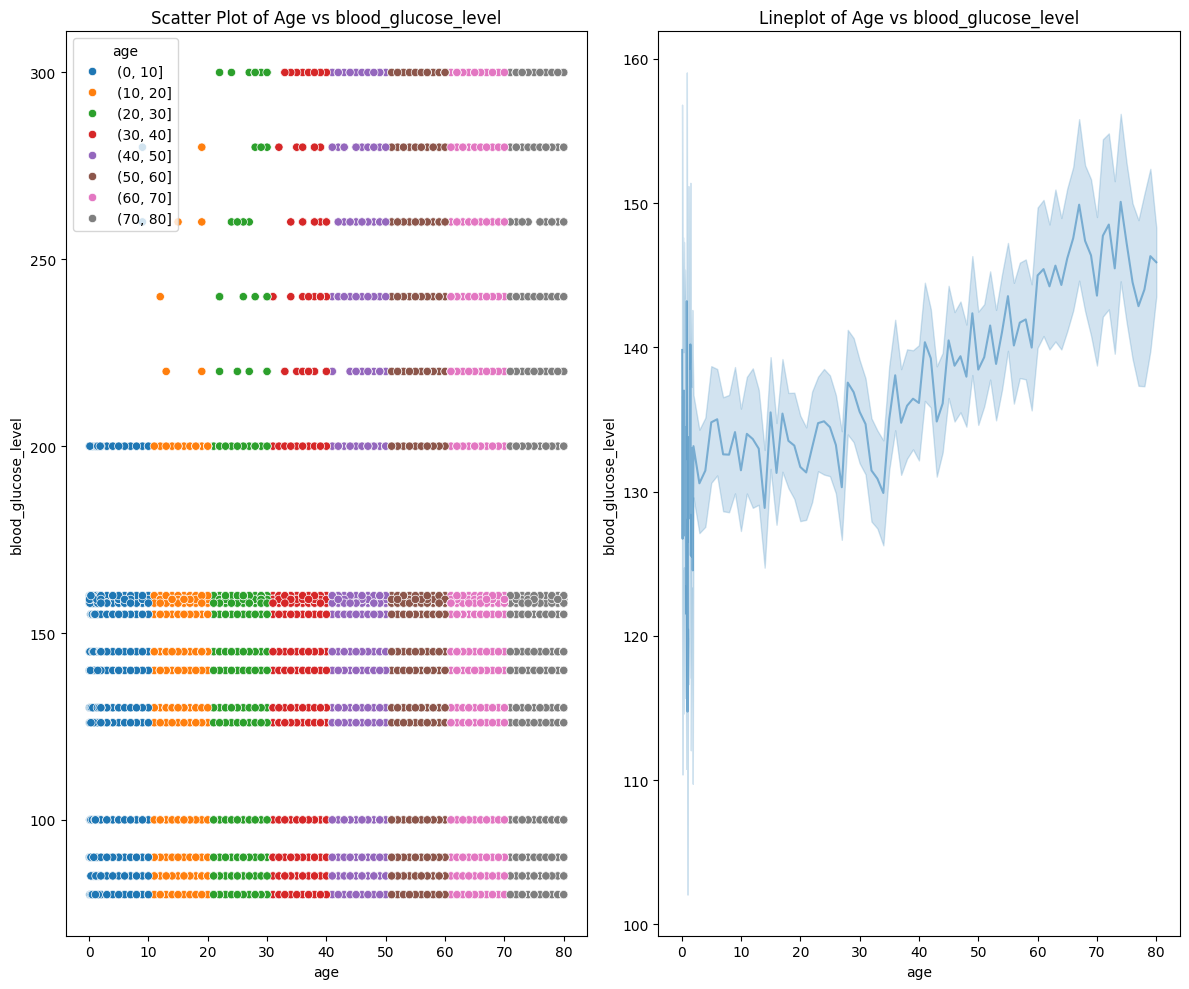

In [78]:
# Analysis of Age with Numerical Features
sample_size = 30000
sample_df = df.sample(n=sample_size,random_state=42)
# Divide the population into different age groups
age_group = pd.cut(df['age'],bins=[0,10,20,30,40,50,60,70,80])
for col in numerical_cols[1:]: # Ignore first col as Age itself
    fig, ax = plt.subplots(1,2,figsize=(12,10))
    sns.scatterplot(x='age',y=col,data=sample_df,hue=age_group,ax=ax[0])
    ax[0].set_title(f'Scatter Plot of Age vs {col}')
    sns.lineplot(x='age',y=col,data=sample_df,ax=ax[1],alpha=0.5)
    ax[1].set_title(f'Lineplot of Age vs {col}')
    plt.tight_layout()

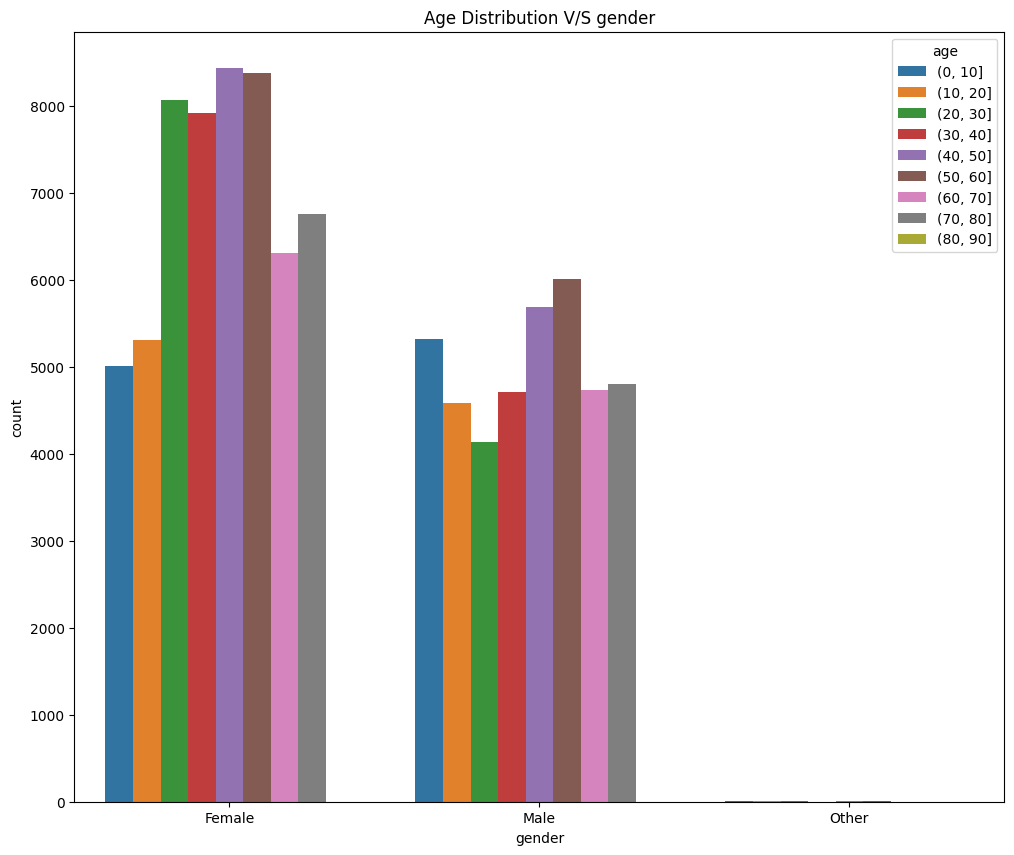

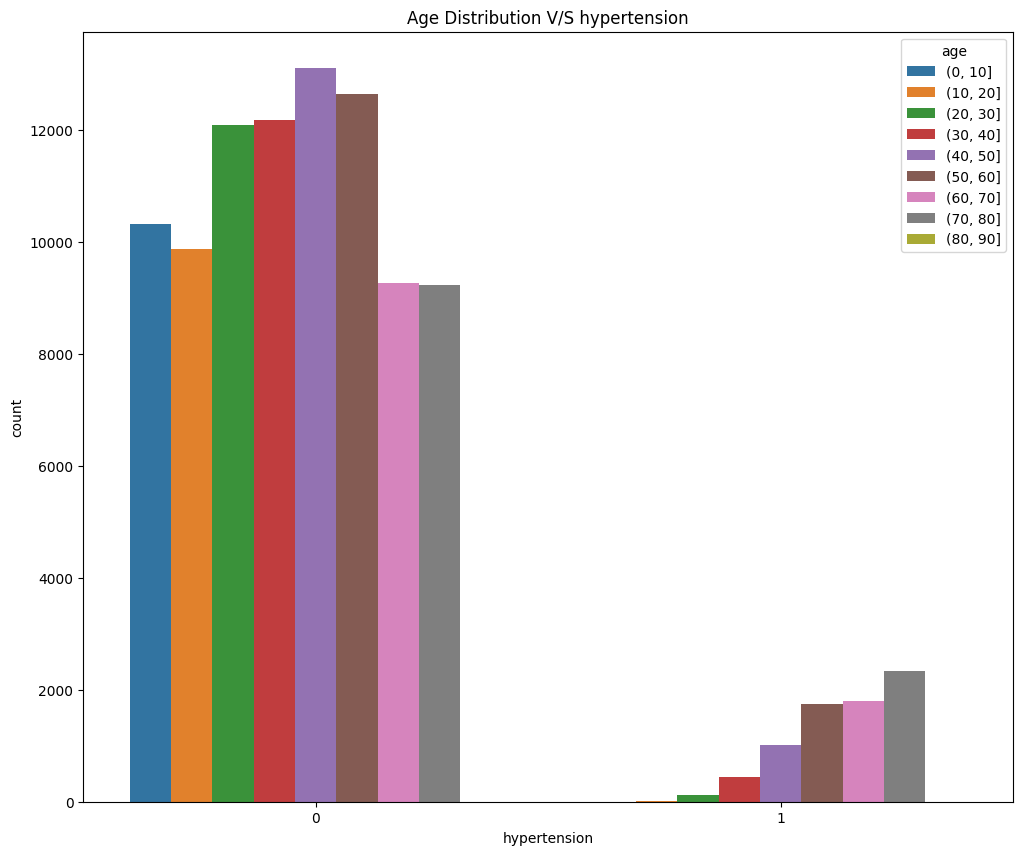

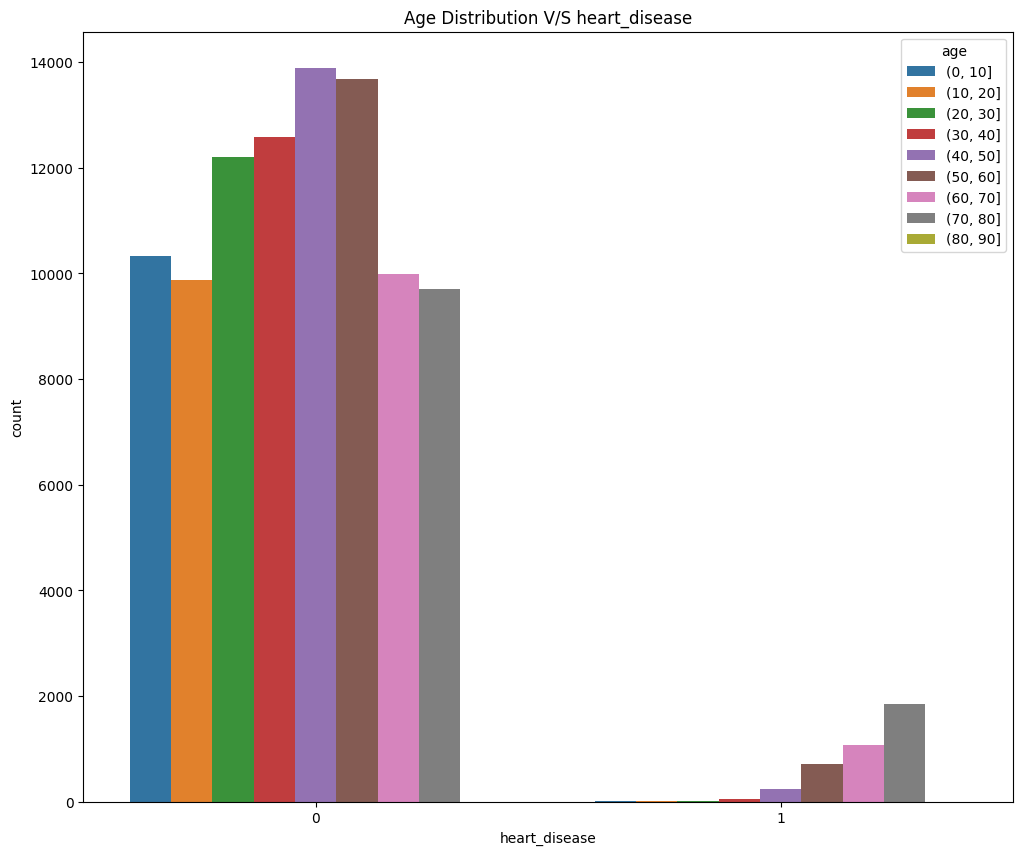

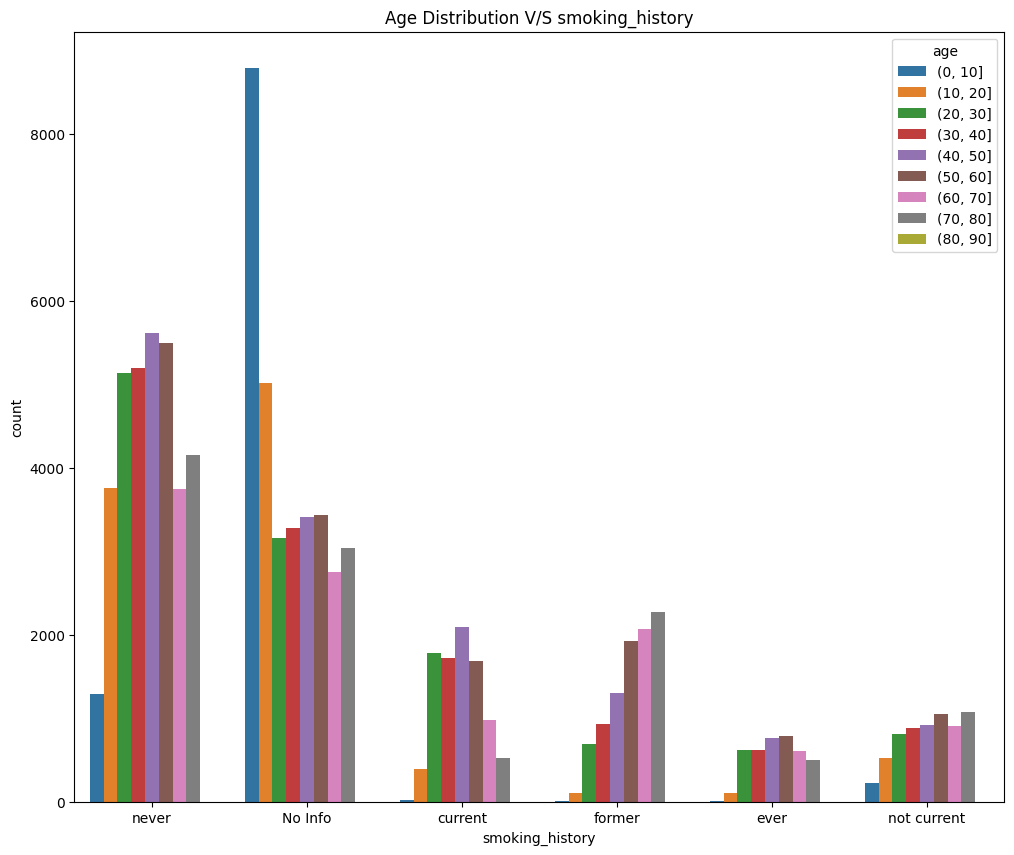

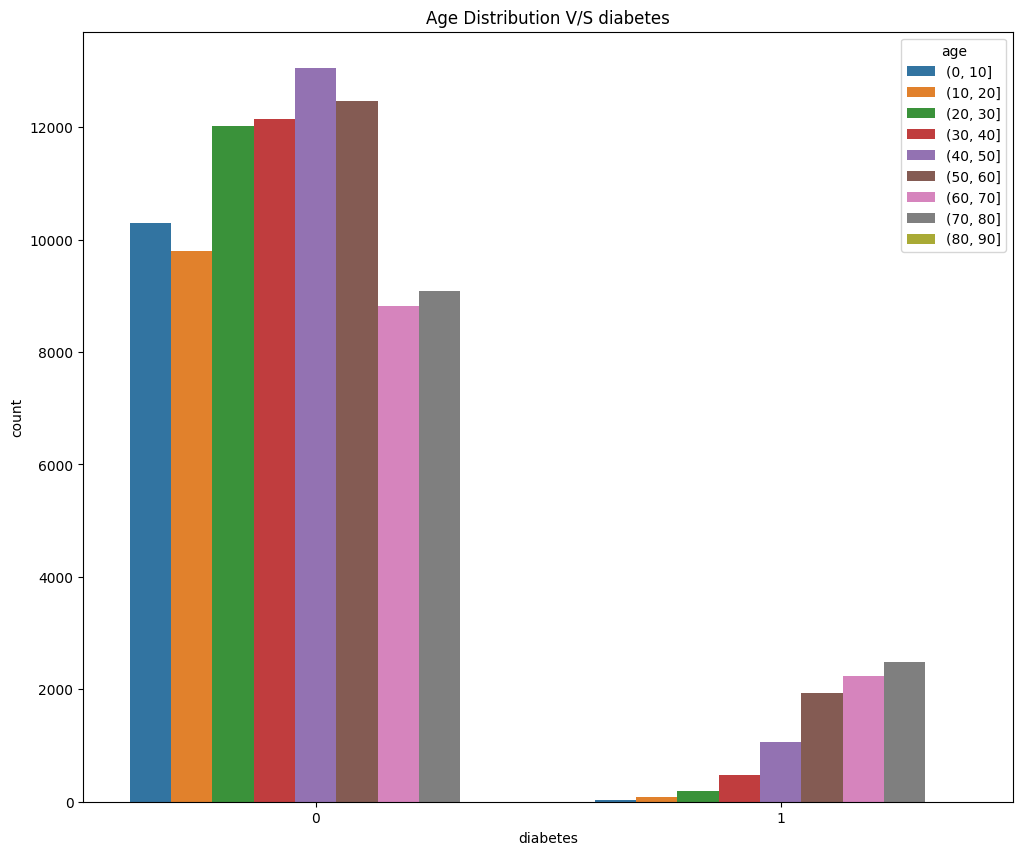

In [79]:
# Analysis of Age with Categorical Features
age_group =pd.cut(df['age'],bins=[0,10,20,30,40,50,60,70,80,90])
for i in non_numeric_cols:
    plt.figure(figsize=(12,10))
    sns.countplot(x=i,data=df,hue=age_group)
    plt.title(f"Age Distribution V/S {i}")

## **ENCODING**

In [80]:
for i in non_numeric_cols:
    print(df[i].value_counts())

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64
hypertension
0    88685
1     7461
Name: count, dtype: int64
heart_disease
0    92223
1     3923
Name: count, dtype: int64
smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64
diabetes
0    87664
1     8482
Name: count, dtype: int64


In [81]:
le = LabelEncoder()
for col in non_numeric_cols:
    df[col] = le.fit_transform(df[col])

In [82]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,0,24.60,4.8,145,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


## **TEST DATA PREPARATION**

In [83]:
df['diabetes'].value_counts()

diabetes
0    87664
1     8482
Name: count, dtype: int64

In [84]:
# Hence the dataset is imbalanced and hence needs to be oversampled

In [85]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [86]:
oversample = SMOTE()
X,y = oversample.fit_resample(X,y)
y.value_counts()

diabetes
0    87664
1    87664
Name: count, dtype: int64

## **MODEL TRAINING**

In [87]:
sample_size = 30000  
sample_df = df.sample(n = sample_size, random_state = 42) 
X = sample_df.drop('diabetes', axis=1)
y = sample_df['diabetes']

In [88]:
# Divide into Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [89]:
X_train

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
43349,0,26.0,0,0,0,33.06,5.0,145
55916,0,30.0,0,0,4,24.60,3.5,200
12631,0,23.0,0,0,2,21.13,4.0,90
96124,1,60.0,0,1,2,31.21,6.5,260
64660,1,60.0,0,0,1,26.10,5.7,145
...,...,...,...,...,...,...,...,...
32140,1,57.0,0,0,5,36.01,6.8,130
86416,0,68.0,0,0,3,30.29,6.1,130
39994,1,80.0,0,0,4,26.50,5.0,90
71592,1,35.0,0,0,4,27.32,6.2,80


In [90]:
svm = SVC()
# Train the Model
svm.fit(X_train,y_train)

SVC()

In [91]:
# Predict the Model
y_pred = svm.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8207
           1       1.00      0.34      0.51       793

    accuracy                           0.94      9000
   macro avg       0.97      0.67      0.74      9000
weighted avg       0.95      0.94      0.93      9000



In [92]:
file = open('D:\ML\DISEASE PREDICTION\DIABETES\Model\diabetesPredictionModel.pkl','wb')
pkl.dump(svm,file)
file.close()